In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [63]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [0]:
df_scraped = pd.read_csv('/content/gdrive/My Drive/Text Analytics Project/Scraped_data_Luxury.csv',na_values='na')

In [65]:
print(df_scraped.shape)
print(df_scraped.head(5))

(5000, 4)
   Unnamed: 0  ...                                            Subject
0           0  ...  I personally think that with a few tweaks the ...
1           1  ...  I am debating a new purchase and these two are...
2           2  ...  Great handling, RWD, excellent engine and the ...
3           3  ...  And no manual tranny. That may not matter to y...
4           4  ...  One beauty of BMW 3 Series is that there are s...

[5 rows x 4 columns]


In [66]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
cleaned_desc = []
cntr = 0



for i in range(len(df_scraped)):
  cntr = cntr+1
  if cntr == 500:
    print('Number of rows read until now:',i+1)
    cntr = 0

  try:
    new_words = []
    body = df_scraped['Subject'][i]
    words = word_tokenize(body)
    for w in words:
      w = w.lstrip().rstrip().lower()
      new_words.append(w)
#    words = w.lstrip().rstrip().lower()
    filtered_words = [w for w in new_words if not w in stop_words]
    filtered_words = [w for w in filtered_words if len(w) > 1]

    cleaned_desc.append(filtered_words)
  except:
    cleaned_desc.append('')

Number of rows read until now: 500
Number of rows read until now: 1000
Number of rows read until now: 1500
Number of rows read until now: 2000
Number of rows read until now: 2500
Number of rows read until now: 3000
Number of rows read until now: 3500
Number of rows read until now: 4000
Number of rows read until now: 4500
Number of rows read until now: 5000


In [68]:
import string

def cleanwords(l):
  cleaned_l = []
  for w in l:
    w = w.lstrip()
    w = w.rstrip()
    w = w.lower()
    w = w.translate(str.maketrans('','',string.punctuation))
    cleaned_l.append(w)
  return cleaned_l
  



df_scraped['Cleaned'] = pd.Series(cleaned_desc)
print(df_scraped.head(5))

df_scraped['Cleaned'] = df_scraped['Cleaned'].map(cleanwords)
print(df_scraped.head(5))

   Unnamed: 0  ...                                            Cleaned
0           0  ...  [personally, think, tweaks, c320, could, also,...
1           1  ...  [debating, new, purchase, two, top, list, pric...
2           2  ...  [great, handling, rwd, excellent, engine, best...
3           3  ...  [manual, tranny, may, matter, certainly, matte...
4           4  ...  [one, beauty, bmw, series, many, models, choos...

[5 rows x 5 columns]
   Unnamed: 0  ...                                            Cleaned
0           0  ...  [personally, think, tweaks, c320, could, also,...
1           1  ...  [debating, new, purchase, two, top, list, pric...
2           2  ...  [great, handling, rwd, excellent, engine, best...
3           3  ...  [manual, tranny, may, matter, certainly, matte...
4           4  ...  [one, beauty, bmw, series, many, models, choos...

[5 rows x 5 columns]


In [70]:
## Importing the Model-Brands file


df_models = pd.read_csv('/content/gdrive/My Drive/Text Analytics Project/models (5).csv',header = None)
print(df_models.head(5))
df_models.rename(columns = {0: "Brand", 1:"Model"},inplace= True) 
print(df_models.head(5))

       0        1
0  acura  integra
1  acura   legend
2  acura    vigor
3  acura      rlx
4  acura      ilx
   Brand    Model
0  acura  integra
1  acura   legend
2  acura    vigor
3  acura      rlx
4  acura      ilx


In [71]:
## Cleaning the entries

def clean(s):
  s_clean = s.lstrip().rstrip().lower()
  s_clean = s_clean.translate(str.maketrans('','',string.punctuation))
  return s_clean

df_models['Brand'] = df_models['Brand'].map(clean)
df_models['Model'] = df_models['Model'].map(clean)
df_models.head(5)

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [0]:
### Using tokenized words

unique_brands = list(set(df_models['Brand'].values.tolist()))
unique_models = list(set(df_models['Model'].values.tolist()))

def brandlist(l):
  brands = []
  for w in l:
    if w in unique_brands:
      brands.append(w)
    elif w in unique_models:
      brand = df_models[df_models['Model'] == w]['Brand'].values[0]
      brands.append(brand)
  brands = list(set(brands))
  return brands


df_scraped['Brandlist'] = df_scraped['Cleaned'].map(brandlist)

In [73]:
df_scraped.head(15)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[chrysler, infiniti, lexus, cadillac, ford, ac..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[acura, honda, lexus]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[]
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw]
5,5,blueguydotcom,"March 26, 2002 8:20PM","good grief, so you wait 9 months for the manua...","[good, grief, wait, months, manual, even, auto...",[bmw]
6,6,hungrywhale,"March 26, 2002 9:02PM",I'll give it a fair shot when the manual comes...,"[ll, give, fair, shot, manual, comes, m, flato...",[]
7,7,blueguydotcom,"March 26, 2002 9:45PM",I understand it's not about the speed. I reall...,"[understand, s, speed, really, nt, care, car, ...",[buick]
8,8,hungrywhale,"March 27, 2002 12:00AM",It sounds like you know why I won't even put i...,"[sounds, like, know, wo, nt, even, put, list, ...",[]
9,9,riez,"March 27, 2002 2:00AM",Is there such a thing as an automatic-only tru...,"[thing, automaticonly, true, performance, seda...",[infiniti]


Text(0.5, 1.0, 'Top 10 Brands')

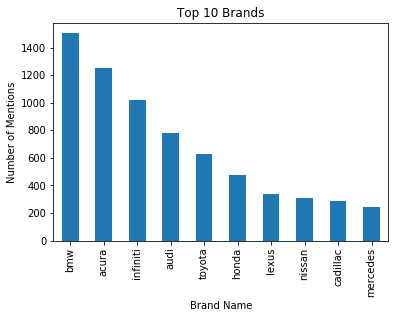

In [74]:
## Top 10 Brands by frequency of mentions

brandcounts = pd.Series(df_scraped['Brandlist'].sum()).value_counts()
brandcounts[:10].plot(kind = 'bar')
plt.xlabel('Brand Name')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Brands')

In [75]:

import itertools
from itertools import product

a = brandcounts.index.tolist()
b = brandcounts.index.tolist()
combinations = pd.DataFrame(itertools.product(a, b))
combinations.columns = ["Brand1","Brand2"]
combinations.head(5)

,Brand1,Brand2
0,bmw,bmw
1,bmw,acura
2,bmw,infiniti
3,bmw,audi
4,bmw,toyota


In [76]:

## Getting the individual Brand Occurences

def getcounts(s):
  counts = brandcounts[s]
  return counts


combinations['Brand1_occurence'] = combinations['Brand1'].map(getcounts)
combinations['Brand2_occurence'] = combinations['Brand2'].map(getcounts)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence
0,bmw,bmw,1504,1504
1,bmw,acura,1504,1253
2,bmw,infiniti,1504,1022
3,bmw,audi,1504,783
4,bmw,toyota,1504,629


In [77]:
## Getting the cooccurences

def getcooccurence(s):
  brands = s.split('&')
  cntr = 0
  if brands[0] != brands[1]:
    for lst in df_scraped['Brandlist'].values.tolist():
      if brands[0] in lst and brands[1] in lst:
        cntr = cntr+1
  return cntr

combinations['Brand1&Brand2'] = combinations['Brand1']+'&'+combinations['Brand2']
combinations['Cooccurence'] = combinations['Brand1&Brand2'].map(getcooccurence)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence
0,bmw,bmw,1504,1504,bmw&bmw,0
1,bmw,acura,1504,1253,bmw&acura,479
2,bmw,infiniti,1504,1022,bmw&infiniti,480
3,bmw,audi,1504,783,bmw&audi,435
4,bmw,toyota,1504,629,bmw&toyota,309


In [78]:
## Calculating the lift

combinations['Lift'] = (5000 * combinations['Cooccurence'])/(combinations['Brand1_occurence']*combinations['Brand2_occurence'])
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
0,bmw,bmw,1504,1504,bmw&bmw,0,0.000000
1,bmw,acura,1504,1253,bmw&acura,479,1.270886
2,bmw,infiniti,1504,1022,bmw&infiniti,480,1.561394
3,bmw,audi,1504,783,bmw&audi,435,1.846927
4,bmw,toyota,1504,629,bmw&toyota,309,1.633165


In [79]:
## Getting in Matrix Format for Lifts

brands = list(combinations['Brand1'].unique())
df_lifts = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = x[x['Brand2'] == j]['Lift'].values[0]
    df_lifts[i].loc[j] = value
 
df_lifts.iloc[:10,:10]

,bmw,acura,infiniti,audi,toyota,honda,lexus,nissan,cadillac,mercedes
bmw,0,1.27089,1.56139,1.84693,1.63316,1.36033,2.0519,1.21284,1.64486,1.7519
acura,1.27089,0,1.90931,1.47793,1.52258,1.83276,1.76431,1.53378,1.55724,1.22528
infiniti,1.56139,1.90931,0,1.84948,1.65672,1.47077,2.29375,2.02388,2.06264,1.52252
audi,1.84693,1.47793,1.84948,0,1.76647,1.43978,2.25489,1.47682,2.06923,2.43769
toyota,1.63316,1.52258,1.65672,1.76647,0,2.4561,3.06643,2.51161,1.88342,1.78113
honda,1.36033,1.83276,1.47077,1.43978,2.4561,0,1.4558,3.63814,1.09112,1.60258
lexus,2.0519,1.76431,2.29375,2.25489,3.06643,1.4558,0,1.59483,2.6365,4.18632
nissan,1.21284,1.53378,2.02388,1.47682,2.51161,3.63814,1.59483,0,1.19171,1.55433
cadillac,1.64486,1.55724,2.06264,2.06923,1.88342,1.09112,2.6365,1.19171,0,3.253
mercedes,1.7519,1.22528,1.52252,2.43769,1.78113,1.60258,4.18632,1.55433,3.253,0


In [80]:
## Getting in Matrix Format for MDS

brands = list(combinations['Brand1'].unique())
df = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = 1/(x[x['Brand2'] == j]['Lift'].values[0])
    if value == float("inf"):
      value = 0
    elif isnan(value):
      value = 0
    df[i].loc[j] = value
 
df.iloc[:10,:10]

,bmw,acura,infiniti,audi,toyota,honda,lexus,nissan,cadillac,mercedes
bmw,0,0.786853,0.640453,0.54144,0.612308,0.735118,0.487354,0.824514,0.607955,0.570809
acura,0.786853,0,0.523749,0.67662,0.656781,0.545625,0.566793,0.651985,0.642162,0.816143
infiniti,0.640453,0.523749,0,0.540693,0.603604,0.679914,0.435967,0.494101,0.484817,0.656805
audi,0.54144,0.67662,0.540693,0,0.5661,0.69455,0.443481,0.67713,0.483271,0.410224
toyota,0.612308,0.656781,0.603604,0.5661,0,0.40715,0.326112,0.398151,0.53095,0.561441
honda,0.735118,0.545625,0.679914,0.69455,0.40715,0,0.686906,0.274865,0.916487,0.623995
lexus,0.487354,0.566793,0.435967,0.443481,0.326112,0.686906,0,0.627024,0.37929,0.238874
nissan,0.824514,0.651985,0.494101,0.67713,0.398151,0.274865,0.627024,0,0.839133,0.643365
cadillac,0.607955,0.642162,0.484817,0.483271,0.53095,0.916487,0.37929,0.839133,0,0.307409
mercedes,0.570809,0.816143,0.656805,0.410224,0.561441,0.623995,0.238874,0.643365,0.307409,0


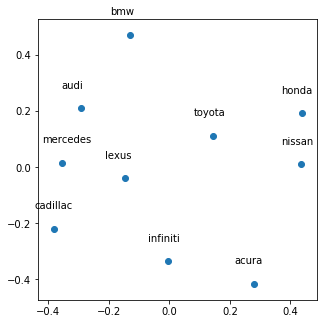

In [81]:
#https://datascience.stackexchange.com/questions/49316/multidimensional-scaling-producing-different-results-for-different-seeds

from sklearn import manifold

df_new = df.iloc[:10,:10]

#df_new = df
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(df_new.values)

brands = df_new.columns
coords = results.embedding_

fig = plt.figure(figsize=(5,5))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(brands, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()


Points to notice from the MDS above:

1) Nissan, Honda and Toyota are comparable brands

2) Mercedes, Audi and Lexus are comparable brands

3) Cadillac is close to Mercedes and no other brands

4) BMW isn't talked with any of the other brands. It suggests that people who own a BMW tend to stick with a BMW

5) Infiniti and Acura are in a cluster of their own

In [82]:
df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[chrysler, infiniti, lexus, cadillac, ford, ac..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[acura, honda, lexus]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[]
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw]


In [83]:
## Getting the top most frequent words

wordcounts = pd.Series(df_scraped['Cleaned'].sum()).value_counts()
wordfrequency = pd.DataFrame(wordcounts)
wordfrequency.reset_index(inplace= True)
wordfrequency.columns = ["Words","Count"]
wordfrequency.head(5)

,Words,Count
0,,7574
1,car,3938
2,s,3902
3,nt,3395
4,cars,1960


Looked at the frequenct words in the comments of users and grouped these words into five major attributes.

1) Performance: If the user talks about the performance of the car. We grouped words like: Engine, Power, Torque, RPM, HorsePower etc

2) Features and Styling: If the user is talking about the internal or external features about the car then they are grouped together. It contains words like: Leather, Design, Interior, Looks, Sporty etc

3) Feel and Comfort: If the user describes how he feels while driving the car we group them under this category. It has words like Luxury, Handling, Fun, Reliable, Quality, Experience etc

4) Economic: If the user talks about the price or mileage details of the cars they come under this category. It has words like Value, Money, Deal, Mileage, MPG etc

5) Dealership Services: If the user talks about thier experience with the dealership or the sales representatives we include them here. It has words like Dealer, Service, Warranty, Support, Salesman etc

In [99]:
## Importing the Words - Attributes file

df_attributes = pd.read_csv('/content/gdrive/My Drive/Text Analytics Project/Attributes Lookup Updated.csv')
print(df_attributes.head(5))

      Words           Attributes  Frequency
0    dealer  Dealership Services        206
1      care  Dealership Services        170
2   service  Dealership Services        118
3  warranty  Dealership Services        105
4      help  Dealership Services        100


In [100]:
### Getting the list of attributes and features discussed in each comment

words_list = list(df_attributes['Words'].values)

def getwordlist(l):
  words = []
  for w in l:
    if w in words_list:
      words.append(w)
  return list(set(words))



df_scraped['WordsList'] = df_scraped['Cleaned'].map(getwordlist)

df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,AttributesList,WordsList
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[chrysler, infiniti, lexus, cadillac, ford, ac...","[Economic, Dealership Services, Performance, F...","[leather, styling, suspension, care, faster, e..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[acura, honda, lexus]","[Economic, Feel and Comfort]","[quality, price, prices, worth, service]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[Performance, Feel and Comfort]","[warranty, handling, engine]"
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[],[manual]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],[Performance],"[performance, transmission, manual, engine]"


In [101]:
## Getting the number of times the features were mentioned throughout
featurecounts = pd.Series(pd.Series(df_scraped['WordsList'].sum()).value_counts())
featurecounts

performance     663
luxury          446
engine          435
price           428
buy             424
handling        387
power           382
interior        340
manual          328
hp              327
feel            320
sport           298
class           280
nice            265
fun             265
torque          246
sales           245
tires           241
speed           240
pretty          235
money           230
package         224
value           220
gas             209
reliability     203
experience      196
miles           182
sports          171
fast            168
quality         163
system          158
cost            158
mileage         157
transmission    154
care            153
dealer          153
faster          150
worth           149
seats           149
weight          145
pay             145
wheels          144
mph             140
mpg             137
steering        137
wheel           137
seat            135
styling         134
size            133
acceleration    129


In [102]:
## Getting combinations of brands and Features. Only the TOP 5 brands are considered here

import itertools
from itertools import product

a = brandcounts[:5].index.tolist()
b = df_attributes['Words'].unique().tolist()
brand_feature_comb = pd.DataFrame(itertools.product(a, b))
brand_feature_comb.columns = ["Brand","Words"]
brand_feature_comb.head(5)

,Brand,Words
0,bmw,dealer
1,bmw,care
2,bmw,service
3,bmw,warranty
4,bmw,help


In [103]:
## Getting the Brand and Feature occurences

def brandcounter(s):
  counts = brandcounts[s]
  return counts

def featcounter(s):
  counts = featurecounts[s]
  return counts

brand_feature_comb['Brand_occurence'] = brand_feature_comb['Brand'].map(brandcounter)
brand_feature_comb['Feature_occurence'] = brand_feature_comb['Words'].map(featcounter)
brand_feature_comb.head(5)

,Brand,Words,Brand_occurence,Feature_occurence
0,bmw,dealer,1504,153
1,bmw,care,1504,153
2,bmw,service,1504,81
3,bmw,warranty,1504,81
4,bmw,help,1504,94


In [104]:
## Getting the brand and feature cooccurences
brand_byuser = df_scraped['Brandlist'].values.tolist()
feat_byuser = df_scraped['WordsList'].values.tolist()

def getcooccurence(s):
  brand = s.split('&')[0]
  feature = s.split('&')[1]
  cntr = 0
  for i in range(5000):
    if brand in brand_byuser[i] and feature in feat_byuser[i]:
      cntr+=1
  return cntr

brand_feature_comb['Brand&Feat'] = brand_feature_comb['Brand']+'&'+brand_feature_comb['Words']
brand_feature_comb['Cooccurence'] = brand_feature_comb['Brand&Feat'].map(getcooccurence)
brand_feature_comb.head(5)

,Brand,Words,Brand_occurence,Feature_occurence,Brand&Feat,Cooccurence
0,bmw,dealer,1504,153,bmw&dealer,67
1,bmw,care,1504,153,bmw&care,68
2,bmw,service,1504,81,bmw&service,40
3,bmw,warranty,1504,81,bmw&warranty,32
4,bmw,help,1504,94,bmw&help,31


In [105]:
## Calculating the lift

brand_feature_comb['Lift'] = (5000 * brand_feature_comb['Cooccurence'])/(brand_feature_comb['Brand_occurence']*brand_feature_comb['Feature_occurence'])
brand_feature_comb.head(5)

,Brand,Words,Brand_occurence,Feature_occurence,Brand&Feat,Cooccurence,Lift
0,bmw,dealer,1504,153,bmw&dealer,67,1.455813
1,bmw,care,1504,153,bmw&care,68,1.477541
2,bmw,service,1504,81,bmw&service,40,1.641713
3,bmw,warranty,1504,81,bmw&warranty,32,1.313370
4,bmw,help,1504,94,bmw&help,31,1.096367


In [106]:
## We need to shortlist the features which has lift > 1 for all of the top 5 brands

## Here we are getting all combinations of brand and feature which has lift > 1 and seeing for each feature how many brands it has a lift > 1
feat_brand_good_lifts = brand_feature_comb[brand_feature_comb['Lift'] > 1]['Words'].value_counts()

## Shortlisting the features which has lift > 1 for all 5 brands

shortlisted_features = list(feat_brand_good_lifts[feat_brand_good_lifts == 5].index)
len(shortlisted_features)

93

Grouping these shortlisted features into 5 attributes and looking at assosciations by brand

In [107]:
shortlisted_features.remove('like')
shortlisted_features.remove('drive')
shortlisted_features.remove('driving')
shortlisted_features.remove('make')
shortlisted_features.remove('good')
shortlisted_features.remove('great')
shortlisted_features.remove('love')
shortlisted_features.remove('brand')
shortlisted_features.remove('looked')
shortlisted_features.remove('rwd')
shortlisted_features.remove('fwd')
shortlisted_features.remove('awd')

ValueError: ignored

In [108]:
len(shortlisted_features)

93

In [109]:
### Getting the list of attributes from the shortlisted features

words_list = shortlisted_features

def getlist(l):
  attributes = []
  for w in l:
    if w in words_list:
      att = df_attributes[df_attributes['Words'] == w]['Attributes'].values[0]
      attributes.append(att)
  return list(set(attributes))


df_scraped['AttributesList'] = df_scraped['Cleaned'].map(getlist)

df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,AttributesList,WordsList
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[chrysler, infiniti, lexus, cadillac, ford, ac...","[Economic, Dealership Services, Performance, F...","[leather, styling, suspension, care, faster, e..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[acura, honda, lexus]","[Economic, Feel and Comfort]","[quality, price, prices, worth, service]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[Performance, Feel and Comfort]","[warranty, handling, engine]"
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[],[manual]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],[Performance],"[performance, transmission, manual, engine]"


In [110]:
## Getting the number of times the attributes were mentioned throughout
attcounts = pd.Series(pd.Series(df_scraped['AttributesList'].sum()).value_counts())
attcounts

Feel and Comfort        2269
Performance             1901
Economic                1855
Features and Styling    1620
Dealership Services      499
dtype: int64

In [111]:
## Getting combinations of brands and attributes

import itertools
from itertools import product

a = brandcounts[:5].index.tolist()
b = df_attributes['Attributes'].unique().tolist()
brand_att_comb = pd.DataFrame(itertools.product(a, b))
brand_att_comb.columns = ["Brand","Attributes"]
brand_att_comb.head(5)

,Brand,Attributes
0,bmw,Dealership Services
1,bmw,Economic
2,bmw,Features and Styling
3,bmw,Feel and Comfort
4,bmw,Performance


In [112]:

## Getting the Brand and Attribute occurences

def brandcounter(s):
  counts = brandcounts[s]
  return counts

def attcounter(s):
  counts = attcounts[s]
  return counts

brand_att_comb['Brand_occurence'] = brand_att_comb['Brand'].map(brandcounter)
brand_att_comb['Attribute_occurence'] = brand_att_comb['Attributes'].map(attcounter)
brand_att_comb.head(5)

,Brand,Attributes,Brand_occurence,Attribute_occurence
0,bmw,Dealership Services,1504,499
1,bmw,Economic,1504,1855
2,bmw,Features and Styling,1504,1620
3,bmw,Feel and Comfort,1504,2269
4,bmw,Performance,1504,1901


In [113]:
## Getting the brand and attribute cooccurences
brand_byuser = df_scraped['Brandlist'].values.tolist()
att_byuser = df_scraped['AttributesList'].values.tolist()

def getcooccurence(s):
  brand = s.split('&')[0]
  attribute = s.split('&')[1]
  cntr = 0
  for i in range(5000):
    if brand in brand_byuser[i] and attribute in att_byuser[i]:
      cntr+=1
  return cntr

brand_att_comb['Brand&Att'] = brand_att_comb['Brand']+'&'+brand_att_comb['Attributes']
brand_att_comb['Cooccurence'] = brand_att_comb['Brand&Att'].map(getcooccurence)
brand_att_comb.head(5)

,Brand,Attributes,Brand_occurence,Attribute_occurence,Brand&Att,Cooccurence
0,bmw,Dealership Services,1504,499,bmw&Dealership Services,206
1,bmw,Economic,1504,1855,bmw&Economic,796
2,bmw,Features and Styling,1504,1620,bmw&Features and Styling,590
3,bmw,Feel and Comfort,1504,2269,bmw&Feel and Comfort,884
4,bmw,Performance,1504,1901,bmw&Performance,757


In [115]:
## Calculating the lift

brand_att_comb['Lift'] = (5000 * brand_att_comb['Cooccurence'])/(brand_att_comb['Brand_occurence']*brand_att_comb['Attribute_occurence'])
brand_att_comb.head(5)

,Brand,Attributes,Brand_occurence,Attribute_occurence,Brand&Att,Cooccurence,Lift
0,bmw,Dealership Services,1504,499,bmw&Dealership Services,206,1.372426
1,bmw,Economic,1504,1855,bmw&Economic,796,1.426564
2,bmw,Features and Styling,1504,1620,bmw&Features and Styling,590,1.210763
3,bmw,Feel and Comfort,1504,2269,bmw&Feel and Comfort,884,1.295209
4,bmw,Performance,1504,1901,bmw&Performance,757,1.323841


In [116]:
## Getting in Matrix Format for Lifts

brands = list(brand_att_comb['Brand'].unique())
atts = list(brand_att_comb['Attributes'].unique())

df_associations = pd.DataFrame(index=brands, columns=atts)
for i in brands:
  for j in atts:
    x = brand_att_comb[brand_att_comb['Brand'] == i]
    value = x[x['Attributes'] == j]['Lift'].values[0]
    df_associations[j].loc[i] = value
 
df_associations

,Dealership Services,Economic,Features and Styling,Feel and Comfort,Performance
bmw,1.37243,1.42656,1.21076,1.29521,1.32384
acura,1.33547,1.36169,1.33999,1.26448,1.30145
infiniti,1.65693,1.43738,1.41939,1.30664,1.33569
audi,1.35648,1.53532,1.4624,1.39309,1.40075
toyota,1.27441,1.5684,1.43771,1.49944,1.46354


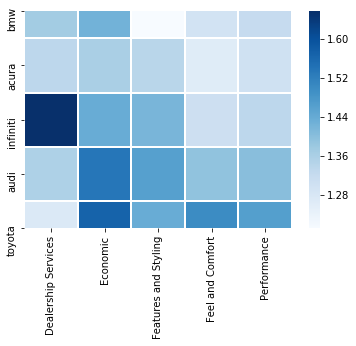

In [117]:
## Getting the heatmaps

df_heatmap = df_associations
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')
sns.heatmap(df_heatmap, cmap='Blues',linewidths=1, linecolor='white')

Observations from Heatmap
Nissan,Mercedes and Lexus have good dealerships

Audi, Honda, Toyota and Lexus are considered economic

Toyota is considered to have better performance than others

It's ironic that this being a luxury forum, the assosciations with 'Feel and Comfort' are low.

In [118]:
df_scraped.head()

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,AttributesList,WordsList
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[chrysler, infiniti, lexus, cadillac, ford, ac...","[Economic, Dealership Services, Performance, F...","[leather, styling, suspension, care, faster, e..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[acura, honda, lexus]","[Economic, Feel and Comfort]","[quality, price, prices, worth, service]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[Performance, Feel and Comfort]","[warranty, handling, engine]"
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[],[manual]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],[Performance],"[performance, transmission, manual, engine]"


In [0]:
aspirational_words=['dream','dreaming','dreams','aspire','aspires','aspiring','wish','wishes','wishing','hope','hopes','hoping','desire','passion','aim']
non_aspirational_words=['no','never','not']

In [0]:
def getBigrams(text):
  bigrm = list(nltk.bigrams(text.split()))
  asp_bigrm=[]
  for i in range(len(bigrm)):
    if (bigrm[i][1] in aspirational_words) & (bigrm[i][0] not in non_aspirational_words):
      asp_bigrm.append(bigrm[i])
  return asp_bigrm

In [0]:
df_scraped['bigram_list']=df_scraped['Subject'].astype(str).map(getBigrams)
df_scraped.rename(columns={'bigram_list':'asp_list'},inplace=True)

In [0]:
total_asp_list=[]
total_brandlist=[]
for i in range(len(df_scraped)):
  total_asp_list=total_asp_list+df_scraped['asp_list'][i]
  total_brandlist=total_brandlist+df_scraped['Brandlist'][i]

In [0]:
pd.options.display.max_rows = 500
from collections import Counter
asp_count=pd.DataFrame(sorted(Counter(total_asp_list).items(), key=lambda x: x[1], reverse=True))
asp_count.rename(columns={0:'asp',1:'frequency'},inplace=True)
asp_count=asp_count[0:10]

In [0]:
pd.options.display.max_rows = 500
from collections import Counter
brand_count=pd.DataFrame(sorted(Counter(total_brandlist).items(), key=lambda x: x[1], reverse=True))
brand_count.rename(columns={0:'brand',1:'frequency'},inplace=True)
brand_count=brand_count[0:10]

In [0]:
asp_list=list(asp_count['asp'])
brand_list=list(brand_count['brand'])

In [0]:
asp_total=[]
asp_total.extend(asp_list*10)
brand_total=[]
brand_total.extend(brand_list*10)

In [0]:
brand_asp_pairs=list(zip(sorted(brand_total),asp_total))

In [0]:
def computeLift(brandA,AspB):
  Lift_AB=0
  N_AB=0
  N=len(df_scraped)
  N_A=brand_count[brand_count['brand']==brandA]['frequency'].values
  N_B=asp_count[asp_count['asp']==AspB]['frequency'].values
  for i in range(len(df_scraped)):
    if((brandA in df_scraped.iloc[i]['Brandlist']) & (AspB in df_scraped.iloc[i]['asp_list'])):
      N_AB+=1
  Lift_AB=(N*N_AB)/(N_A*N_B)
  return(Lift_AB)

In [0]:
brand_asp_assoc=[]
for i in range(len(brand_asp_pairs)):
  brand_asp_assoc.append((brand_asp_pairs[i],computeLift(brand_asp_pairs[i][0],brand_asp_pairs[i][1])[0]))

In [0]:
brand_asp_table=pd.DataFrame(brand_asp_assoc)
brand_asp_table.rename(columns={0:'brand_asp_pairs',1:'lift'},inplace=True)

In [0]:
brand_asp_table=brand_asp_table[brand_asp_table['lift']>1].sort_values(by='lift',ascending=False)

In [0]:
brand_asp_table[['brand', 'asp']] = pd.DataFrame(brand_asp_table['brand_asp_pairs'].tolist())

In [133]:
brand_asp_table

,brand_asp_pairs,lift,brand,asp
77,"(mercedes, (do, wish))",6.915629,NaN,NaN
63,"(lexus, (I'm, hoping))",5.934718,NaN,NaN
35,"(cadillac, (was, hoping))",5.807201,infiniti,"(just, wish)"
88,"(nissan, (to, aspire))",5.428882,NaN,NaN
99,"(toyota, (just, wish))",5.299417,NaN,NaN
98,"(toyota, (to, aspire))",5.299417,NaN,NaN
97,"(toyota, (do, wish))",5.299417,NaN,NaN
44,"(honda, (and, hope))",5.219207,acura,"(do, wish)"
69,"(lexus, (just, wish))",4.945598,NaN,NaN
67,"(lexus, (do, wish))",4.945598,NaN,NaN


In [0]:
brands_asp=pd.DataFrame(brand_asp_table['brand_asp_pairs'].values.tolist(), index=brand_asp_table.index)
brands_asp['lift']=brand_asp_table['lift']
brands_asp.rename(columns={0:'brandA',1:'aspB'},inplace=True)

In [135]:
brands_asp.groupby(['brandA'])['lift'].agg(mean).sort_values(ascending=False)

brandA
lexus       4.293679
cadillac    3.809876
toyota      3.589151
mercedes    3.576568
honda       3.566458
nissan      2.994110
infiniti    2.419313
bmw         2.216312
audi        1.785630
acura       1.692331
Name: lift, dtype: float64

In [0]:
df_scraped.to_csv('df_scraped.csv')